In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

## 教師なし変換（unsupervised transformations）

- 元のデータ表現を変換して、人間や他の機械学習アルゴリズムにとってより分かりやすい新しいデータ表現を作るアルゴリズムのこと
    - ex)次元削減　→　たくさんの特徴量で構成されるデータの高次元表現を入力として、少量の本質的な特徴を表す特徴量でそのデータを表すようやく方法を見つける
    - ex)そのデータを構成する部品、成分を見つける。文章データからトピックを見つけ出し抽出したりできる

## クラスタリングアルゴリズム

- データを似たような要素から構成されるグループに分けるアルゴリズム

## 教師なし学習の難しさ

- アルゴリズムが学習した後の有用性の評価
- 教師なし学習の結果を評価するには、結果を人間が確かめるしかない場合が多い
- このため、教師なし学習は、大きなシステムの自動システムの一部としてよりも、データサイエンティストがデータをよりよく理解するために探索的に用いられることが多い（教師あり学習のデータの前処理など）
- 「本当の」教師なし学習を見る前に、より簡単に使えて、有用なデータの前処理を見ておく

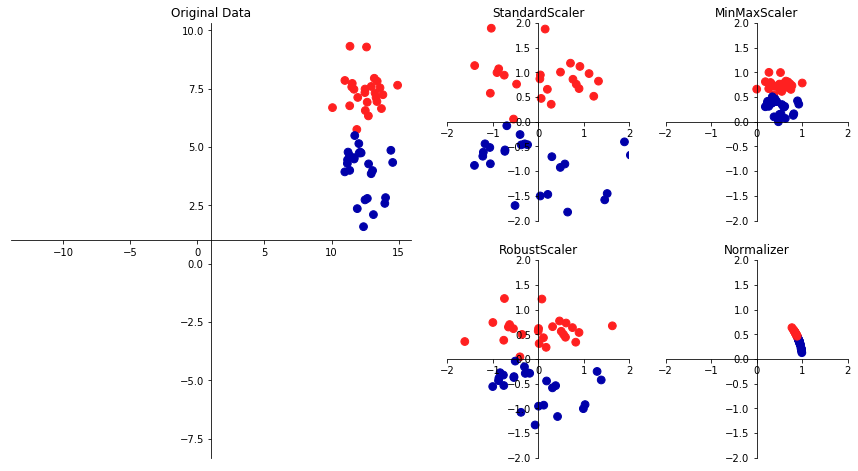

In [2]:
mglearn.plots.plot_scaling()

- StandardScaler : 個々の特徴量の平均が0で分散が1になるように変換し、全ての特徴量の大きさを揃えてくれる。しかし、特徴量の最大値や最小値がある範囲に入ることを保証するものではない
- RobustScaler : 個々の特徴量が一定の範囲に入るように変換する。しかし、平均・分散の代わりに中央値と四分位数を用いる
- MInMaxScaler : データがちょうど0から1の間に入るように変換する
- Normalizer : 個々のデータポイントを、特徴量ベクトルがユークリッド長1になるように変換する。言い換えると、データポイントを半径1の円に投射する。したがって、全てのデータポイントに対して、異なるスケール変換が行われる

In [3]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

- スケール変換器のfitメソッドには、X_trainのみを与え、y_trainは与えない

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

- 実際に訓練データをスケール変換するには、スケール変換器のtransformメソッドを用いる

In [7]:
#データを変換
X_train_scaled = scaler.transform(X_train)
# スケール変換の前後のデータ特性をプリント
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling: {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling: {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling: {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling: {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling: [  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
per-feature maximum before scaling: [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01 

In [8]:
#テストデータを変換
X_test_scaled = scaler.transform(X_test)
#スケール変換前後のデータ特性をプリント
print("per-feature minimum before scaling: {}".format(X_test.min(axis=0)))
print("per-feature maximum before scaling: {}".format(X_test.max(axis=0)))
print("per-feature minimum after scaling: {}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling: {}".format(X_test_scaled.max(axis=0)))

per-feature minimum before scaling: [  7.69100000e+00   1.03800000e+01   4.83400000e+01   1.70400000e+02
   6.82800000e-02   3.11600000e-02   0.00000000e+00   0.00000000e+00
   1.36500000e-01   4.99600000e-02   1.11500000e-01   3.87100000e-01
   8.48400000e-01   7.22800000e+00   2.86600000e-03   3.74600000e-03
   0.00000000e+00   0.00000000e+00   7.88200000e-03   1.08700000e-03
   8.67800000e+00   1.42000000e+01   5.44900000e+01   2.23600000e+02
   8.77400000e-02   5.13100000e-02   0.00000000e+00   0.00000000e+00
   1.56500000e-01   5.50400000e-02]
per-feature maximum before scaling: [  2.72200000e+01   3.38100000e+01   1.82100000e+02   2.25000000e+03
   1.42500000e-01   3.45400000e-01   3.75400000e-01   1.87800000e-01
   2.90600000e-01   9.74400000e-02   1.29200000e+00   2.61200000e+00
   1.01200000e+01   1.58700000e+02   1.60400000e-02   1.00600000e-01
   3.03800000e-01   3.32200000e-02   7.89500000e-02   1.22000000e-02
   3.31200000e+01   4.17800000e+01   2.20800000e+02   3.21600000

- 訓練データとテストデータを同じように変換する

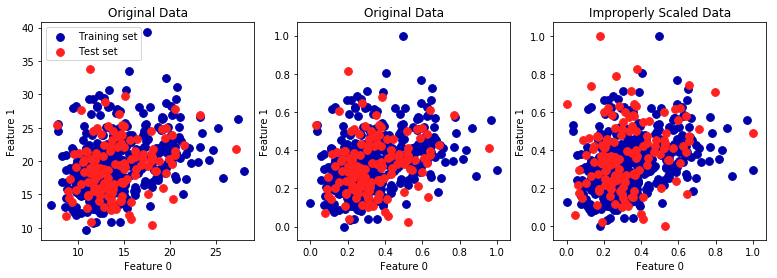

In [15]:
from sklearn.datasets import make_blobs

#合成データを作成
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
#訓練セットとテストセットをプロット
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# MinMaxScalerでデータをスケール変換
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# スケール変換されたデータの特性を可視化
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Original Data")

# テストセットと訓練セットを別々にスケール変換
# 最小値と最大値が0, 1になる。ここでは説明のためにわざとやっている
# *実際には絶対にやってはいけない！！！！！*

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

#間違ってスケールされたデータを可視化
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], c=mglearn.cm2(1), label="Test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

## 教師あり学習における前処理の効果

In [17]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


In [20]:
#0-1スケール変換で前処理
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストセットでスコア計算
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [22]:
from sklearn.preprocessing import StandardScaler

#StandardScalerで前処理
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストセットでスコア計算
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.96


## 主成分分析

- データセットの特徴量を相互に統計的に関連しないように回転する手法
- 多くの場合、回転したあとの特徴量から、データを説明するのに重要な一部の特徴量だけを抜き出す

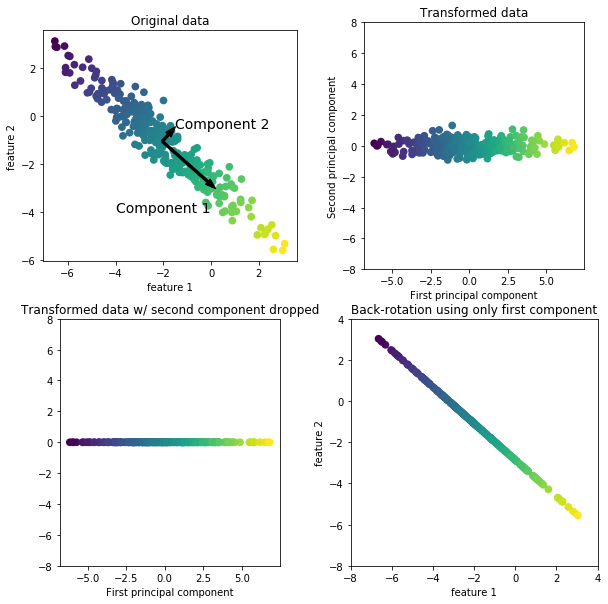

In [23]:
mglearn.plots.plot_pca_illustration()

- まず、最も分散が大きい方向を見つける
- それに「第１成分」というラベルを付ける
- データはこの方向に対して最も情報を持つ。つまり、この方向は、特徴量が最も相互に関係する方向と言える
- 次に、第１成分と直交する（直角に交わっている）方向の中から、最も情報を持っている方向を探す
- このようにして見つけていく方向を「主成分」と言う。この方向がデータの分散が存在する主要な方向だから

- 右上のプロットは、同じデータを最初の主成分がx軸沿い、二つ目の主成分がy軸に沿うように回転させたもの
- 原点にデータの中心が来るように、平均値をあらかじめ引いてから回転させている
- 回転後の表現では、2つの軸の相関はない。この表現でのデータの相関行列は、対角成分を除いてゼロである
- 主成分のうち、いくつかだけを残すことで、PCAを次元削減に使うことができる

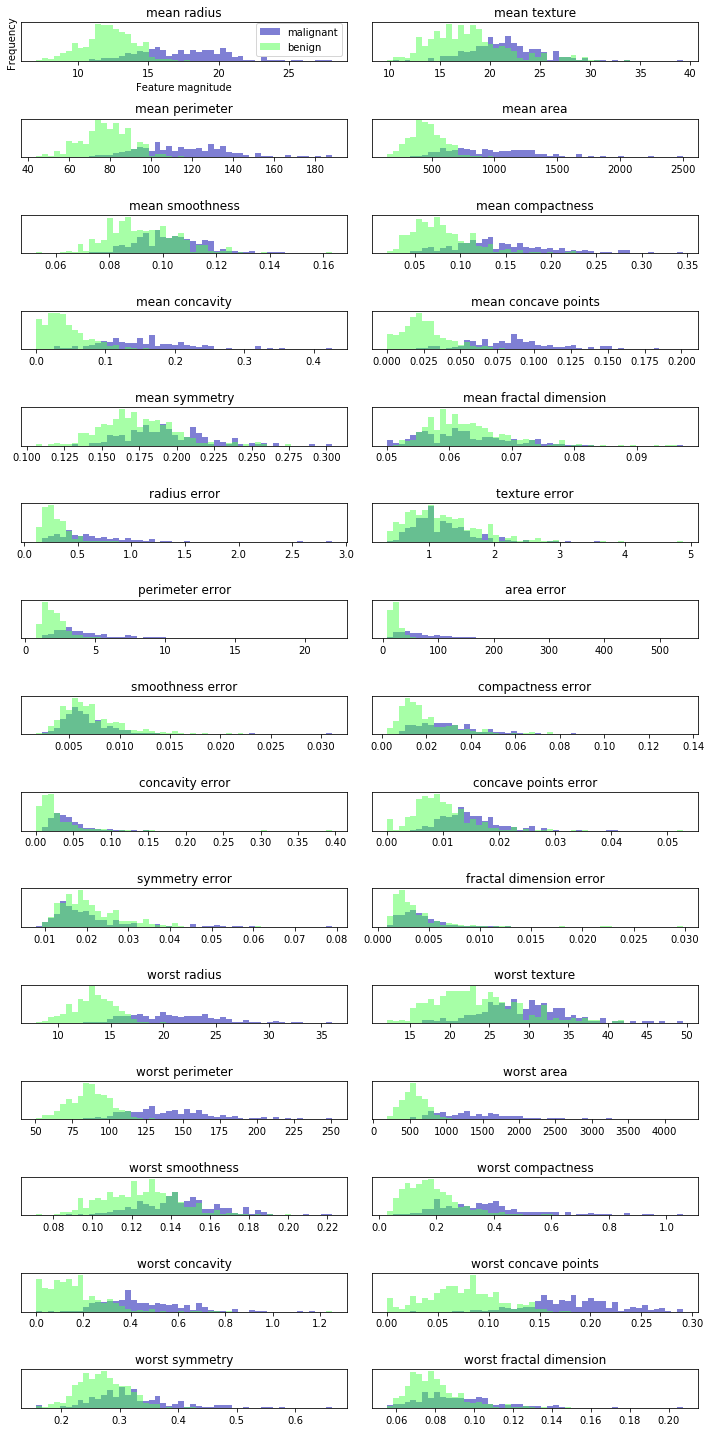

In [24]:
# cancerデータセットのPCAによる可視化

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target ==0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i] .hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i] .hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [26]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [29]:
from sklearn.decomposition import PCA
#データの最初の二つの主成分だけ維持する
pca = PCA(n_components=2)
# cancerデータセットにPCAモデルを適合
pca.fit(X_scaled)

# 最初の2つの主成分に対してデータポイントを変換
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


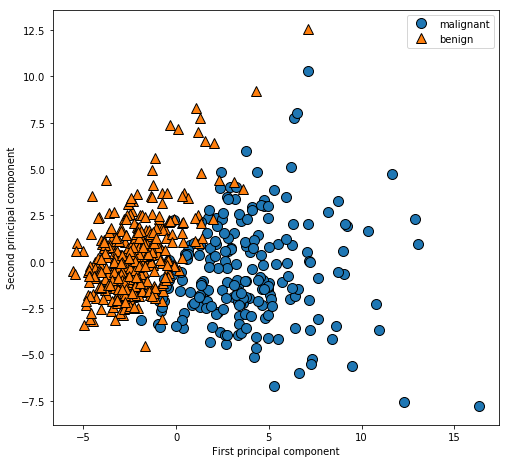

In [30]:
#第１主成分と第２主成分によるプロット。クラスごとに色分け
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [31]:
# 主成分はPCAの適合を行う過程で、components_属性に格納される
# プロットした二つの軸の組み合わせは、一般に非常に複雑で、わかりにくい
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [32]:
print("PCA components:\n {}".format(pca.components_))

PCA components:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


## PCAのもう一つの利用方法（特徴量抽出）

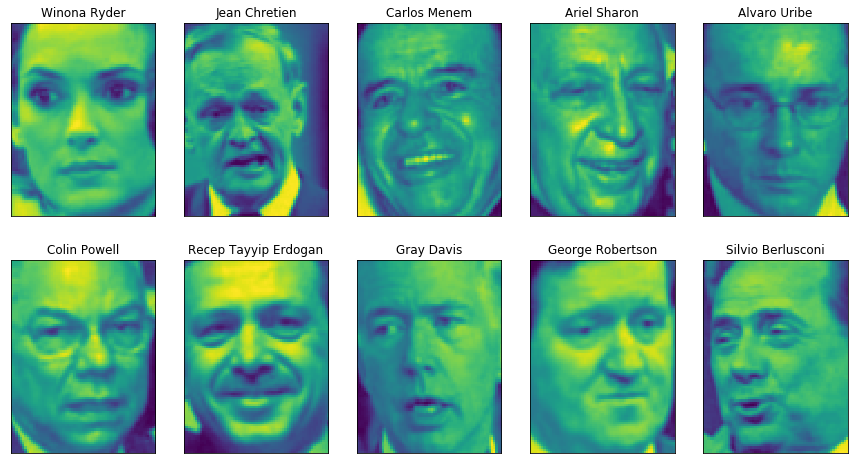

In [35]:
from sklearn.datasets import fetch_lfw_people
people =fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [36]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [37]:
# 各ターゲットの出現回数をカウント
counts = np.bincount(people.target)
#ターゲット名と出現回数を並べて表示
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name,count), end='    ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


In [38]:
#George W Bushの画像が多い偏りをなくす

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

#0から255で表現されている、グレースケールの値0と1に変換
#こうした方が数値的に安定する
X_people = X_people / 255.

- 顔認識の簡単な方法として、1-最近傍法クラス分類器を使う方法がある
- クラス分類しようとしている顔に一番近い顔を探すことになる

In [39]:
from sklearn.neighbors import KNeighborsClassifier
#訓練セットとテストセットにデータを分割
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# KNeighborsClassifierを1-最近傍で構築
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.26


- ランダムに選択すると、1.5%になる、62クラス問題にしては悪くない性能
- ただ、良くもない。４回に一度しか人物の顔を特定できない
- 顔の近似度を測るのに、元のピクセル空間は全く適していない
- PCAのwhitenオプションを使ってみる（主成分のスケール変換を行う）
    →データを回転するだけでなく、楕円ではなく円を描くようにスケール変換する

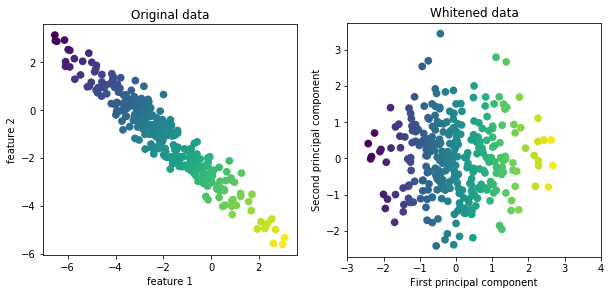

In [40]:
mglearn.plots.plot_pca_whitening()

In [41]:
#PCAオブジェクトを訓練し、最初の100成分を抜き出す
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [42]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.33


In [43]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


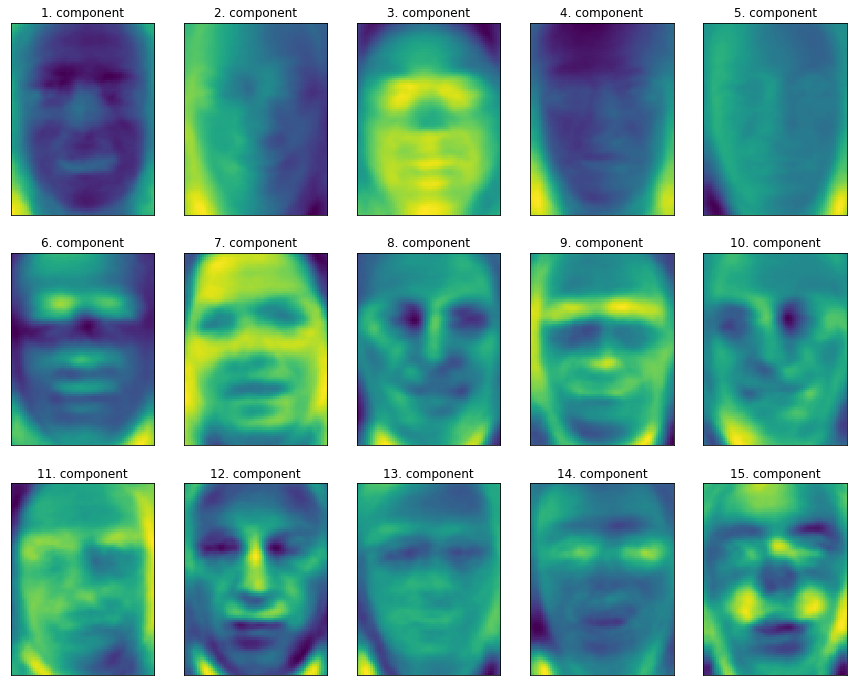

In [44]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
             cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

- PCAはテストデータポイントを主成分の重み付き和として表現することができる、と解釈することもできる

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[ 0.635294, ...,  0.777778],
       ..., 
       [ 0.057516, ...,  0.963399]], dtype=float32), 
array([[ 0.512418, ...,  0.969935],
       ..., 
       [ 0.037908, ...,  0.070588]], dtype=float32))
_______________________________________________________pca_faces - 10.9s, 0.2min


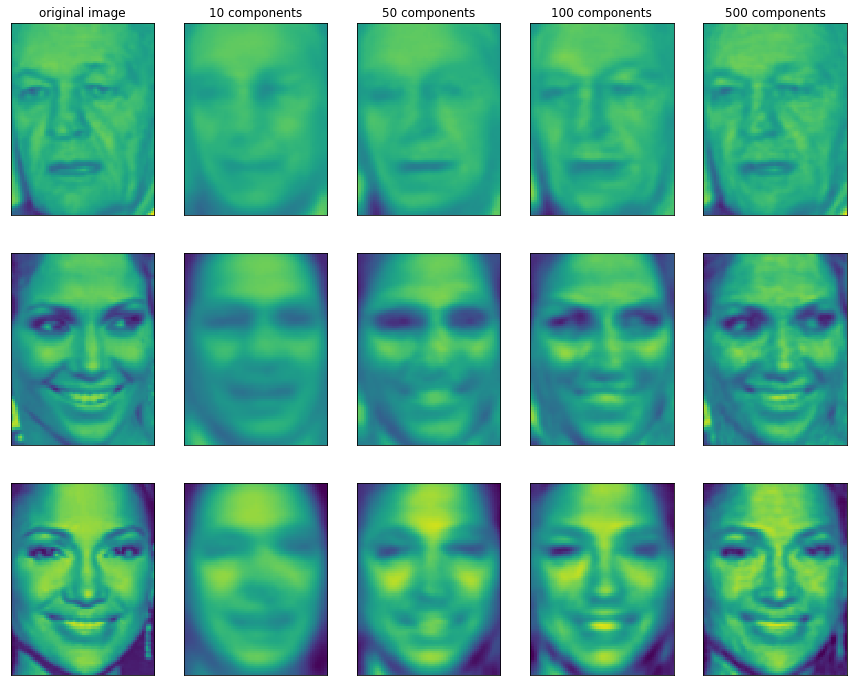

In [45]:
# 主成分のいくつかだけ残したものを逆回転して元の空間に戻した時の様子
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

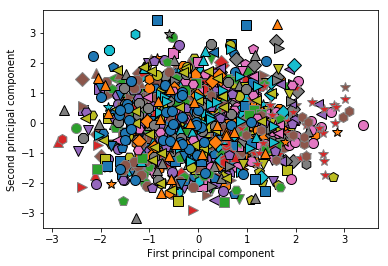

In [46]:
# PCAを用いて、データセット中の全ての顔を最初の2つの主成分を用いて散布図をプロットする
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:,1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- 二つの主成分だけでは、データ全体がひとまとまりになってしまい、クラス分類できそうにない